ANN(Artficial Neural Network) <br>

1. 인공신경망 총칭하는 용어
- 중간층 활성 함수 - relu
- 출력층 활성함수
>다중분류 : softmax, 이진분류 : sigmoid or softmax, 회귀 : relu




MNIST 손글씨 데이터 분류하기

In [1]:
# modeling
from keras import layers, models

Using TensorFlow backend.


In [2]:
def ann_seq_func(Nin, Nh, Nout):
    model = models.Sequential()
    
    model.add(layers.Dense(Nh, activation='relu', input_shape=(Nin,)))
    model.add(layers.Dense(Nout, activation='softmax'))
    
    '''
    오차(비용) 함수 : categorical_crossentropy
                      (활성화 함수롷 softmax 사용하기 때문)
    최적화 함수 : SGD(확률 경사 하강법)
    metrics 성능 확인 : accuracy
    '''
    model.compile(loss='categorical_crossentropy', optimizer='sgd', 
                  metrics=['accuracy'])
    
    return model

In [3]:
# Data
from keras import datasets 
from keras.utils import np_utils

import matplotlib.pyplot as plt
%matplotlib inline


'''
MNiST 데이터 셋
- 이미지 데이터 X, 0~9까지 붙인 이름표를 Y
총 70000개의
60000개 - 훈련 데이터, 10000개 - 검증 데이터로 read한 구조
'''

def data_fun():
    (x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
    
    # 가로 세로 28*28 픽셀로 이미지 그리기
    plt.imshow(x_train[1:2].reshape(28, 28))
    plt.show()    
    
    # 원핫인코딩을 위한 keras API, 0~9까지의 
    # 정수값 형태가 아닌 0이나 1로 이뤄진 백터로 수정
    # 3인 경 [0,0,1,0,0,0,0,0,0]
    y_train = np_utils.to_categorical(y_train)
    y_test = np_utils.to_categorical(y_test)
    
    L, W, H = x_train.shape  #(60000, 28, 28)
       
    #? 행 개수는 상관없고, 열을 28*28 즉 784로 reshape
    x_train = x_train.reshape(-1, W*H)
    x_test = x_test.reshape(-1, W*H)
    
    return (x_train, y_train), (x_test, y_test)

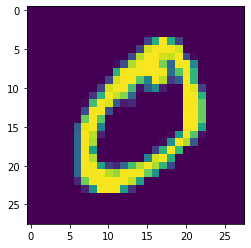

Train on 48000 samples, validate on 12000 samples
Epoch 1/12
48000/48000 [==============================] - 1s 23us/step - loss: 216.8189 - accuracy: 0.1939 - val_loss: 2.0975 - val_accuracy: 0.1948
Epoch 2/12
48000/48000 [==============================] - 1s 25us/step - loss: 2.0407 - accuracy: 0.2313 - val_loss: 1.9409 - val_accuracy: 0.2562
Epoch 3/12
48000/48000 [==============================] - 1s 23us/step - loss: 1.8566 - accuracy: 0.3225 - val_loss: 1.8152 - val_accuracy: 0.3421
Epoch 4/12
48000/48000 [==============================] - 1s 24us/step - loss: 1.6367 - accuracy: 0.4174 - val_loss: 1.4014 - val_accuracy: 0.5036
Epoch 5/12
48000/48000 [==============================] - 1s 22us/step - loss: 1.4281 - accuracy: 0.5063 - val_loss: 1.3876 - val_accuracy: 0.5218
Epoch 6/12
48000/48000 [==============================] - 1s 22us/step - loss: 1.3419 - accuracy: 0.5446 - val_loss: 1.2606 - val_accuracy: 0.5637
Epoch 7/12
48000/48000 [==============================] - 1s 22us/

In [4]:
# 분류 학습 및 성능 분석

def main():
    Nin = 784
    Nh = 100
    Nout = 10
    
    model = ann_seq_func(Nin, Nh, Nout)
    
    (x_train, y_train), (x_test, y_test) = data_fun()
    
    # 학습 : 훈련 + 학습 동안 성능을 검증하는 구조로 학습
    # epochs = 15, batch_size=100, 검증데이터 20%
    history = model.fit(x_train, y_train, epochs=12, 
                        batch_size=100, validation_split=0.2)
    
    # 학습 후에 성능 검증 
    performance_test = model.evaluate(x_test, y_test, batch_size=100)
    print("loss와 평가 ", performance_test)


main()

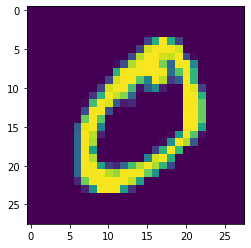

((array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0., 0., 0., ..., 0., 0., 0.],
         [1., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)),
 (array([[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
  array([[0., 0., 0., ..., 1., 0., 0.],
         [0., 0., 1., ..., 0., 0., 0.],
         [0., 1., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]], dtype=f

In [5]:
data_fun()